###  Calculating $\pi$ with Monte Carlo 

0
1 3.28
1
10 3.172
2
100 3.1236
3
1000 3.13948
4
10000 3.136812
5
100000 3.1419264
6
1000000 3.14145072


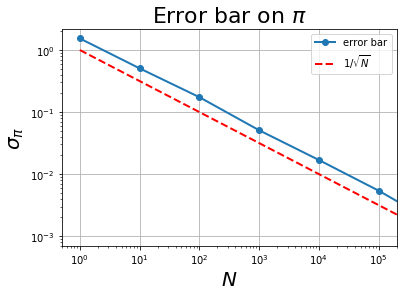

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import numpy.linalg
import matplotlib.pyplot as plt

n_orders = 7 # for deciding how many points we use to sample pi 
n_pts, error_bar = np.zeros(n_orders), np.zeros(n_orders)

# loop over n_orders orders of magnitude
for p in range(n_orders):
        
    print p 
    
    M = pow(10,p)    # number of points used to sample pi
    average_pi = 0.
    average_pi2 = 0.
    
    # compute pi estimate and average each time over 100 values
    for i in range(100):
        stones = rnd.rand(M,2) # creat M x,y points
        dist = numpy.linalg.norm(stones, axis=1) # compute |x + y|
        inside = np.sum(dist < 1.) # check if inside circle
        pi_estimate = 4.*inside/M # estimation of pi
        average_pi += pi_estimate 
        average_pi2 += pi_estimate**2
    average_pi /= 100
    print M, average_pi
    average_pi2 /= 100
    
    n_pts[p] = M
    error_bar[p] = np.sqrt(average_pi2 - average_pi**2) # calculating the error 

plt.loglog(n_pts, error_bar, '-o', lw=2, label='error bar') # log-log plot of calculated error
plt.loglog(n_pts, np.sqrt(1)/np.sqrt(n_pts), 'r--', lw=2, label=r'$1 / \sqrt{N}$') # log-log plot of theoretical error
plt.title("Error bar on $\pi$", fontsize=22)
plt.xlabel('$N$', fontsize=20)
plt.ylabel(r'$\sigma_\pi$', fontsize=20)
plt.grid()
plt.xlim(0.5, 2e5)
plt.legend()

As we can see the calculated error from the simulation is proportional to $1/\sqrt{N}$, which is what we set out to prove